In [1]:
from NeuralNet import *
import numpy as np

Epoch: 0, loss: 0.30049276789302426
Epoch: 1, loss: 0.29932277874714064
Epoch: 2, loss: 0.29818769445204546
Epoch: 3, loss: 0.297085947118168
Epoch: 4, loss: 0.2960163124665045
Epoch: 5, loss: 0.2949776090897559
Epoch: 6, loss: 0.29396869854398555
Epoch: 7, loss: 0.2929884851131166
Epoch: 8, loss: 0.2920359153050423
Epoch: 9, loss: 0.29110997713026343
Epoch: 10, loss: 0.2902096992069635
Epoch: 11, loss: 0.2893341497302144
Epoch: 12, loss: 0.28848243533751716
Epoch: 13, loss: 0.2876536998980585
Epoch: 14, loss: 0.2868471232488322
Epoch: 15, loss: 0.28606191989708996
Epoch: 16, loss: 0.2852973377053756
Epoch: 17, loss: 0.2845526565726198
Epoch: 18, loss: 0.28382718712237176
Epoch: 19, loss: 0.2831202694071793
Epoch: 20, loss: 0.2824312716363609
Epoch: 21, loss: 0.28175958893289677
Epoch: 22, loss: 0.28110464212388464
Epoch: 23, loss: 0.2804658765679103
Epoch: 24, loss: 0.2798427610217663
Epoch: 25, loss: 0.2792347865481798
Epoch: 26, loss: 0.2786414654655632
Epoch: 27, loss: 0.2780623303

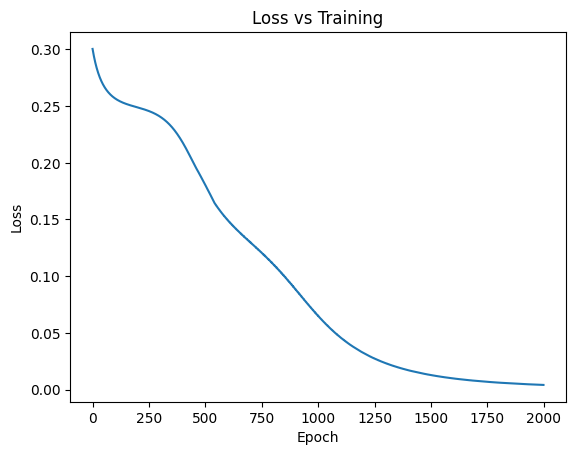

Predicciones:
[[0.11355579]
 [0.98178928]
 [0.95039294]
 [0.02190295]]


In [2]:
nn = Network(
[
    Linear(2, 5),
    Relu(),
    Linear(5,1),
    Sigmoid()
])



X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

nn.train(X, y, epochs=2000, lr=0.1)
print("Predicciones:")
print(nn.forward(X))

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Cargar datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar imágenes a [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplanar imágenes: de (28, 28) a (784,)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Shapes:", X_train.shape, y_train.shape)

2025-05-25 13:01:37.345356: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-25 13:01:37.354854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748170897.366480   22611 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748170897.369539   22611 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748170897.378210   22611 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Shapes: (60000, 784) (60000, 10)


Epoch: 0, loss: 0.14834570716822001
Epoch: 1, loss: 0.1358292710512653
Epoch: 2, loss: 0.1444875937292002
Epoch: 3, loss: 0.1604500727864085
Epoch: 4, loss: 0.13354786970562244
Epoch: 5, loss: 0.13158569674065143
Epoch: 6, loss: 0.11024579317546188
Epoch: 7, loss: 0.10648429107624419
Epoch: 8, loss: 0.10011373282890754
Epoch: 9, loss: 0.06993211358764138
Epoch: 10, loss: 0.06414498315331443
Epoch: 11, loss: 0.061254863296856386
Epoch: 12, loss: 0.058995543477461006
Epoch: 13, loss: 0.057226027125498874
Epoch: 14, loss: 0.05564828202046357
Epoch: 15, loss: 0.05427704837826907
Epoch: 16, loss: 0.05296924375197222
Epoch: 17, loss: 0.051682601523981936
Epoch: 18, loss: 0.0505055796144112
Epoch: 19, loss: 0.049374453893448536
Epoch: 20, loss: 0.04830549591026042
Epoch: 21, loss: 0.04721737731998936
Epoch: 22, loss: 0.04622164186081331
Epoch: 23, loss: 0.04519320528391369
Epoch: 24, loss: 0.04419457587450563
Epoch: 25, loss: 0.04332149235888238
Epoch: 26, loss: 0.042472953232799204
Epoch: 27

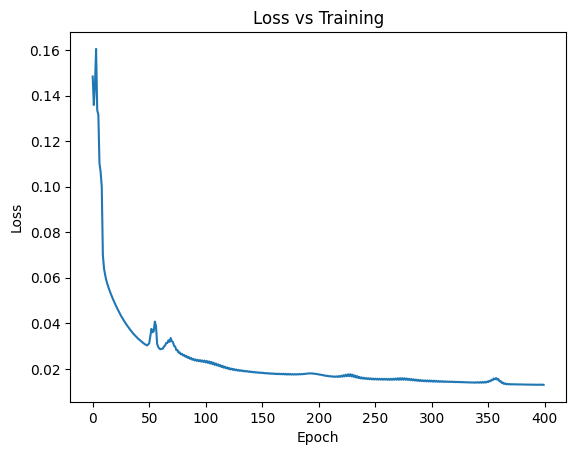

In [10]:
nn = Network(
[
    Linear(784,300),
    Relu(),
    Linear(300,50),
    Sigmoid(),
    Linear(50,10),
    Softmax()
])




nn.train(X_train, y_train, epochs=400, lr=1)

In [13]:
y_pred = nn.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)      
y_true_labels = np.argmax(y_test, axis=1)     

accuracy = np.mean(y_pred_labels == y_true_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9115


In [14]:
nn.save('MNIST')

In [21]:
load = Network('MNIST')